# Homework 8:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [1]:
setwd("~/Downloads")
DATA = read.csv("unrestricted_trimmed_1_7_2020_10_50_44 copy.csv")
head(DATA)

install.packages("tidyverse")
library(tidyverse)

subset = c("Subject", "Gender", "Flanker_Unadj", "FS_IntraCranial_Vol", "FS_Tot_WM_Vol", "FS_Total_GM_Vol")

DATAclean = na.omit(DATA[subset])
DATAclean$Gender = gsub('M','1',DATAclean$Gender)
DATAclean$Gender = gsub('F','0',DATAclean$Gender)
DATAclean$Gender = as.numeric(DATAclean$Gender)
head(DATAclean)

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80



The downloaded binary packages are in
	/var/folders/3w/m1hxgx4d3g38l_05xm_y1b700000gn/T//Rtmptz6u5g/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2,100206,1,130.42,1864518,543134,807245
3,100307,0,112.56,1512540,407292,664124
4,100408,1,121.18,1684117,500417,726206
5,100610,1,126.53,1816044,512946,762308
6,101006,0,101.85,1437868,429449,579632
7,101107,1,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 


The downloaded binary packages are in
	/var/folders/3w/m1hxgx4d3g38l_05xm_y1b700000gn/T//Rtmptz6u5g/downloaded_packages


`geom_smooth()` using formula 'y ~ x'



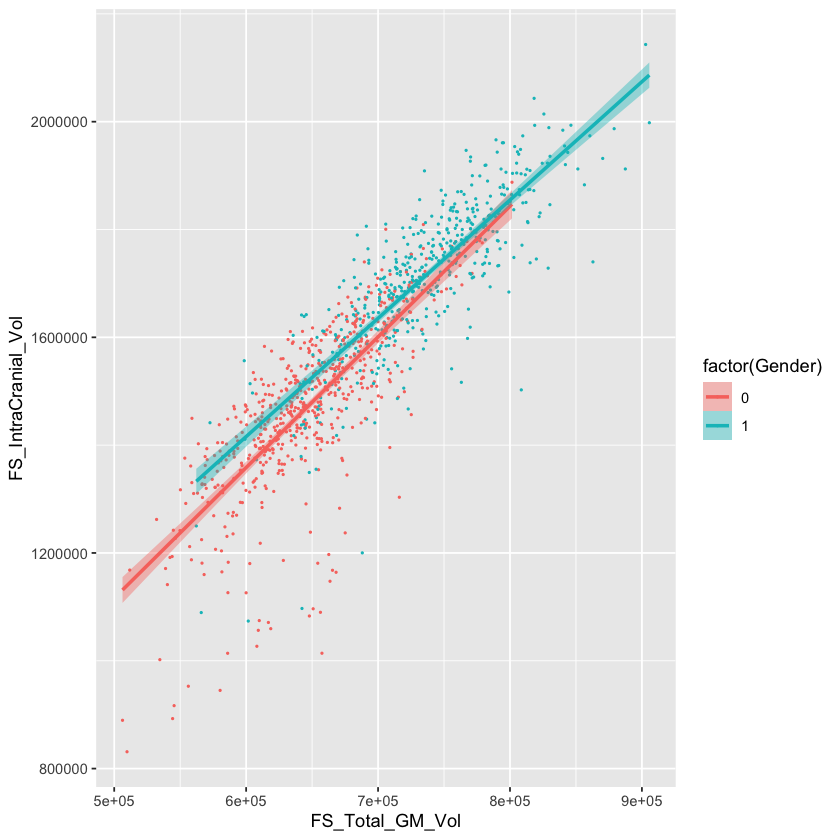

In [2]:
install.packages("ggplot2")
library(ggplot2)
graph = ggplot(data = DATAclean, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, fill=factor(Gender), group = factor(Gender), color = factor(Gender))) +
    geom_point(size=0.25) +
    geom_smooth(method='lm')

graph

What patterns do you observe in the scatter plot?

> Although the female line of best fit is more positive by a small margin, both of the groups exhibit a positive trend.
> 

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [3]:
logist <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = DATAclean, family = binomial)
summary(logist)


Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = DATAclean)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> Grey matter volume and intracranial volume (due to their p-scores)
> 

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [4]:
pre = rep(1, nrow(DATAclean))
pre[(predict(logist,DATAclean)) < .5] = 0
confusion_df = data.frame(pre, DATAclean$Gender)
colnames(confusion_df) = c('F = 0', 'M = 1')

ttable = table(confusion_df)
ttable
prop.table(ttable,margin = 2)

     M = 1
F = 0   0   1
    0 547 152
    1  59 355

     M = 1
F = 0          0          1
    0 0.90264026 0.29980276
    1 0.09735974 0.70019724

What is the prediction accuracy for gender from the full model?

>81%

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model. Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


In [ ]:
# WRITE YOUR CODE HERE



How robust is the prediction accuracy of the full model?

> *Write your response here* 
> 

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

In [ ]:
# WRITE YOUR CODE HERE



How much does the grey matter volume influence the prediction accuracy of the model?

> *Write your response here* 
> 

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> *Write your response here* 
> 

**DUE:** 5pm EST, April 1, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*